## Observations and Insights

## Dependencies and starter code

In [118]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

#Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
 
#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen = merge_data_df.groupby(["Drug Regimen"])
regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()
regimen_median = group_regimen["Tumor Volume (mm3)"].median()
regimen_variance = group_regimen["Tumor Volume (mm3)"].var()
regimen_std = group_regimen["Tumor Volume (mm3)"].std()
regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_mean,"Variance": regimen_variance,
                           "Standard deviation":regimen_std,"SEM":regimen_sem})
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.322552,52.322552,42.351070,6.507770,0.512884
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


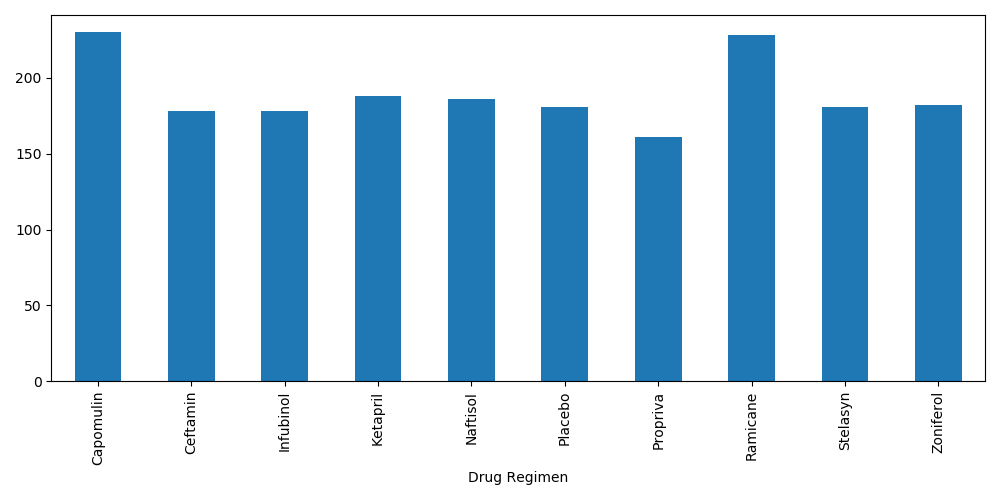

In [117]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_regimen = merge_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
fig, pandas = plt.subplots()
pandas = treatment_regimen.plot(kind="bar", figsize=(10,5))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


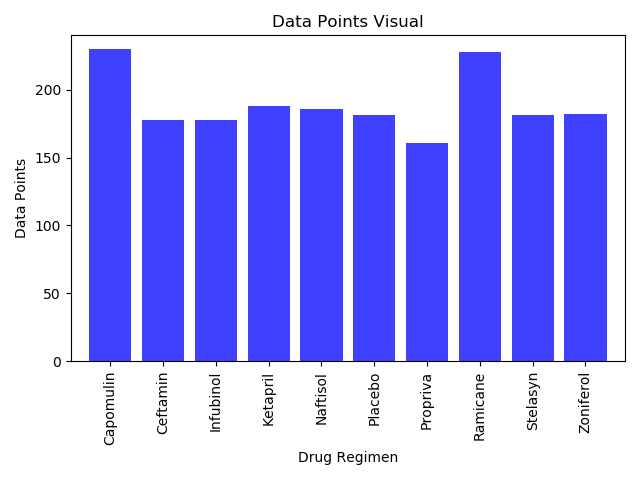

In [116]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(treatment_regimen))
fig, axes = plt.subplots()
axes = plt.bar(x_axis, y_axis, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol" ,"Ketapril",
                           "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.tight_layout()

## Pie plots

<IPython.core.display.Javascript object>


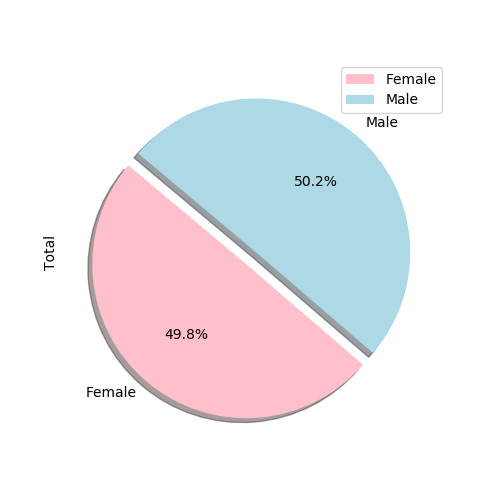

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = merge_data_df.groupby(["Mouse ID","Sex"])
mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total"]
mouse_gender["Percentage"] = (100*(mouse_gender["Total"]/mouse_gender["Total"].sum()))
mouse_gender["Percentage"] = mouse_gender["Percentage"]
mouse_gender


colors = ['pink', 'lightblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total',figsize=(5,5), 
                             colors = colors, startangle=140, explode = explode, 
                             shadow = True, autopct="%1.1f%%")

<IPython.core.display.Javascript object>


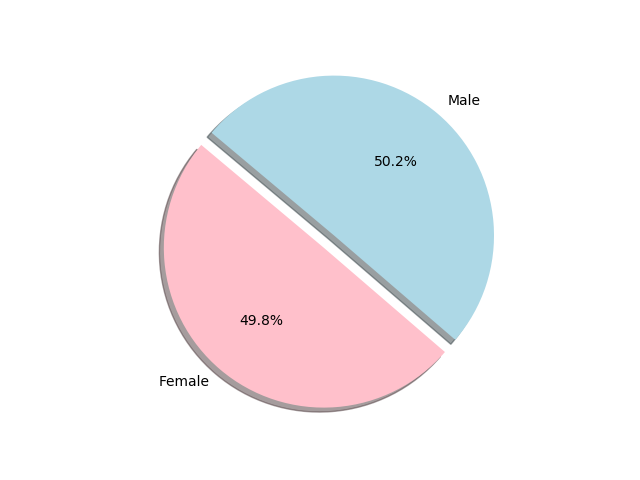

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, axe = plt.subplots()
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'lightblue']
explode = (0.1, 0)
axe = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_regimes = merge_data_df[merge_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

<IPython.core.display.Javascript object>


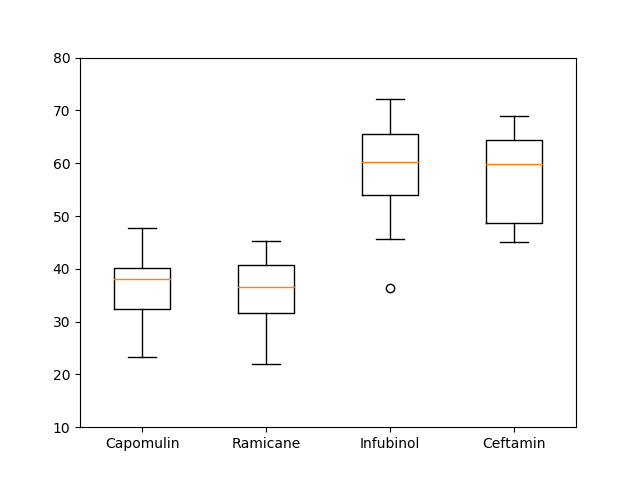

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
fig, box = plt.subplots()
box = plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()


## Line and scatter plots

<IPython.core.display.Javascript object>


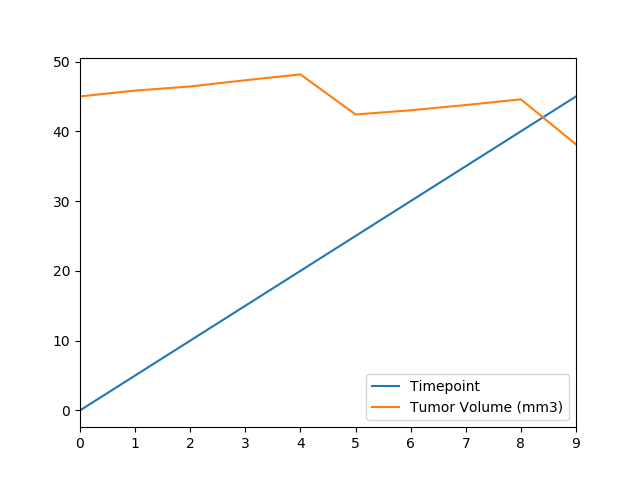

In [84]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = merge_data_df[merge_data_df["Mouse ID"].isin(["j119"])]
time_vs_tumer
time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data
line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final
lines = line_plot_final.plot.line()

<IPython.core.display.Javascript object>


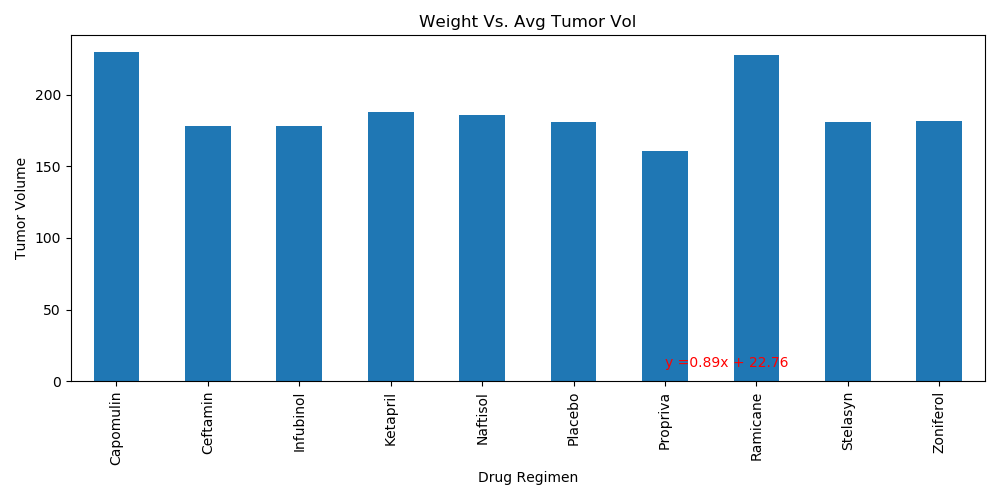

In [88]:
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = merge_data_df[merge_data_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)
capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


In [97]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()